In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/second/sample_submission.csv
/kaggle/input/second/data_description.txt
/kaggle/input/second/train.csv
/kaggle/input/second/test.csv


In [3]:

# Step 3: Load Data
df = pd.read_csv('/kaggle/input/second/train.csv')


In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


დაყოფა

In [5]:
# Step 4: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950


In [7]:

# Step 5: Check Shapes
print(df.shape)
print(X_train.shape, X_test.shape)


(1460, 81)
(1168, 81) (292, 81)


In [8]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950


In [9]:
missing_ratio = X_train.isna().mean().sort_values(ascending=False)
print(missing_ratio[missing_ratio > 0])

PoolQC          0.994863
MiscFeature     0.960616
Alley           0.936644
Fence           0.800514
MasVnrType      0.584760
FireplaceQu     0.468322
LotFrontage     0.185788
GarageYrBlt     0.054795
GarageCond      0.054795
GarageType      0.054795
GarageFinish    0.054795
GarageQual      0.054795
BsmtQual        0.023973
BsmtCond        0.023973
BsmtFinType2    0.023973
BsmtFinType1    0.023973
BsmtExposure    0.023973
MasVnrArea      0.005137
Electrical      0.000856
dtype: float64


გასუფთავების ეტაპი

In [10]:

X_train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True, errors='ignore')
X_test.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True, errors='ignore')


In [11]:

X_train['street_num'] = np.where(X_train['Street'] == 'Pave', 1, 0)
X_test['street_num'] = np.where(X_test['Street'] == 'Pave', 1, 0)


In [12]:
X_train['central_air_num'] = np.where(X_train['CentralAir'] == 'Y', 1, 0)
X_test['central_air_num'] = np.where(X_test['CentralAir'] == 'Y', 1, 0)


In [13]:

X_train.drop(columns=['Street', 'CentralAir'], inplace=True)
X_test.drop(columns=['Street', 'CentralAir'], inplace=True)


In [14]:

X_train.fillna(X_train.median(numeric_only=True), inplace=True)
X_test.fillna(X_train.median(numeric_only=True), inplace=True)


In [15]:

train_ids = X_train.pop('Id') if 'Id' in X_train.columns else None
y_train = X_train.pop('SalePrice')


In [16]:
test_ids = X_test.pop('Id') if 'Id' in X_test.columns else None
y_test = X_test.pop('SalePrice')


In [17]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(1168, 75) (1168,) (292, 75) (292,)


In [18]:

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train.select_dtypes(include=[np.number]), y_train)


პრედიქშენი

In [19]:

prob_train = model.predict(X_train.select_dtypes(include=[np.number]))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse_train = np.sqrt(mean_squared_error(y_train, prob_train))
mae_train = mean_absolute_error(y_train, prob_train)
r2_train = r2_score(y_train, prob_train)

print("Train RMSE:", rmse_train)
print("Train MAE:", mae_train)
print("Train R^2:", r2_train)


Train RMSE: 33857.52495598295
Train MAE: 21053.730063608542
Train R^2: 0.8078091518795896


In [20]:

prob_test = model.predict(X_test.select_dtypes(include=[np.number]))

rmse_test = np.sqrt(mean_squared_error(y_test, prob_test))
mae_test = mean_absolute_error(y_test, prob_test)
r2_test = r2_score(y_test, prob_test)

print("Test RMSE:", rmse_test)
print("Test MAE:", mae_test)
print("Test R^2:", r2_test)


Test RMSE: 36660.86754992761
Test MAE: 22793.196463894874
Test R^2: 0.8247767861223445


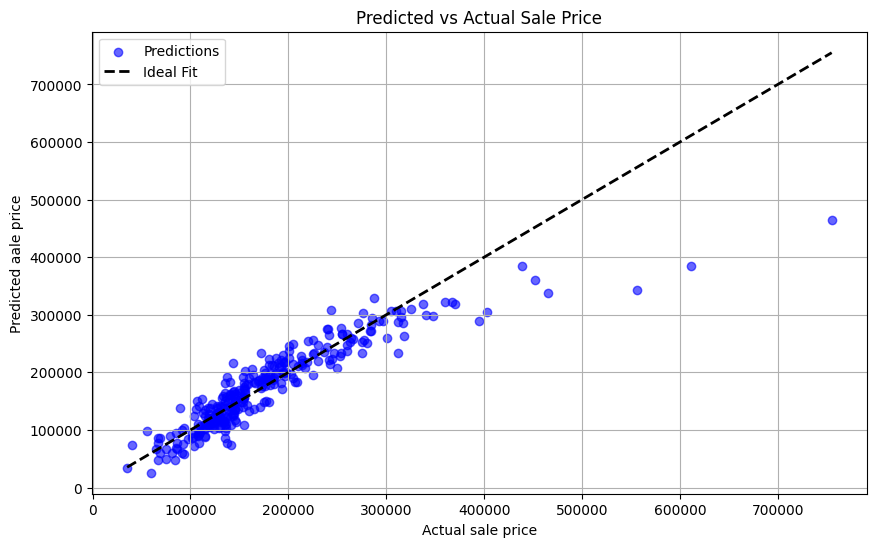

In [21]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, prob_test, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual sale price")
plt.ylabel("Predicted aale price")
plt.title("Predicted vs Actual Sale Price")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
!pip install dagshub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 5.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: dacite
    Found existing installation: dacite 1.9.2
    Uninstalling dacite-1.9.2:
      Successfully uninstalled dacite-1.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.2 requires dacite>=1.8, but you have dacite 1.6.0 which is incompatible.


დაგსჰაბის დაკავშირება

In [24]:
import dagshub
dagshub.init(repo_owner='nurch22', repo_name='my-first-repo', mlflow=True)


❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=f169f03a-468a-4e24-8d3d-79ec0074ec7e&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=b7fadfd2bc036bdf6c4f2a3e75001229defe1d6c19aaca40a133caaa49ea50f5




Output()

Accessing as nurch22

Initialized MLflow to track repo "nurch22/my-first-repo"

Repository nurch22/my-first-repo initialized!

In [25]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 54.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 82.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.6 MB/s eta 0:00:00


mlflow-ზე ატვირთვა

2025/04/09 16:40:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run mercurial-foal-137 at: https://dagshub.com/nurch22/my-first-repo.mlflow/#/experiments/0/runs/c52b2e6cd66d42c5a2d2d6ba10a201ae
🧪 View experiment at: https://dagshub.com/nurch22/my-first-repo.mlflow/#/experiments/0


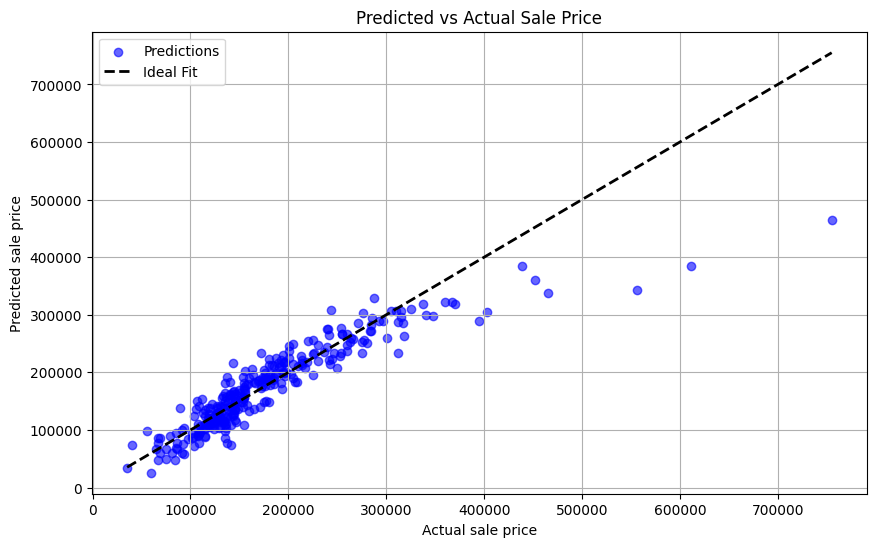

In [26]:

import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Train the Linear Regression Model
model = LinearRegression().fit(X_train.select_dtypes(include=[np.number]), y_train)

# Step 11: Predict on Train
prob_train = model.predict(X_train.select_dtypes(include=[np.number]))

rmse_train = np.sqrt(mean_squared_error(y_train, prob_train))
mae_train = mean_absolute_error(y_train, prob_train)
r2_train = r2_score(y_train, prob_train)

# Step 12: Predict on Test
prob_test = model.predict(X_test.select_dtypes(include=[np.number]))

rmse_test = np.sqrt(mean_squared_error(y_test, prob_test))
mae_test = mean_absolute_error(y_test, prob_test)
r2_test = r2_score(y_test, prob_test)

# Log the metrics to MLflow
with mlflow.start_run():
    mlflow.log_param("model_type", "Linear Regression")
    mlflow.log_metric("train_rmse", rmse_train)
    mlflow.log_metric("train_mae", mae_train)
    mlflow.log_metric("train_r2", r2_train)
    mlflow.log_metric("test_rmse", rmse_test)
    mlflow.log_metric("test_mae", mae_test)
    mlflow.log_metric("test_r2", r2_test)
    
    # Log the model
    mlflow.sklearn.log_model(model, "linear_regression_model")

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, prob_test, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual sale price")
plt.ylabel("Predicted sale price")
plt.title("Predicted vs Actual Sale Price")
plt.legend()
plt.grid(True)
plt.show()
